In [46]:
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import SimpleITK as sitk
import numpy as np
import cv2

In [56]:
#Image selection
imagen = "Case00"
prostata = sitk.GetArrayFromImage(sitk.ReadImage(f"../Train-data/{imagen}.mhd", sitk.sitkFloat32))
segmentacion = sitk.GetArrayFromImage(sitk.ReadImage(f"../Train-data/{imagen}_segmentation.mhd", sitk.sitkFloat32))

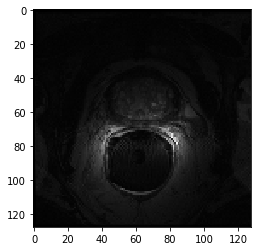

In [63]:
#Slice normalization 
img = prostata[36]
img = 255*((img - img.min())/(img.max() - img.min())) # to convert image to grayscale from 0 to 255
plt.gray() # GrayScale
plt.imshow(img)

#### Ecualización corte

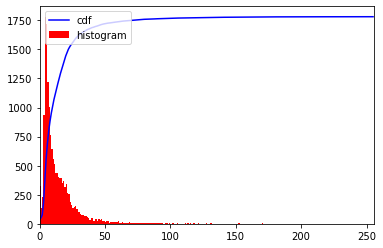

In [64]:
# Histogram Sllice
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [66]:
img = np.array(img, dtype = np.uint8)
equ = cv2.equalizeHist(img) # Histogram Equalization 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(20,20))
cl1 = clahe.apply(img) #Contrast Limited Adaptive Histogram Equalization

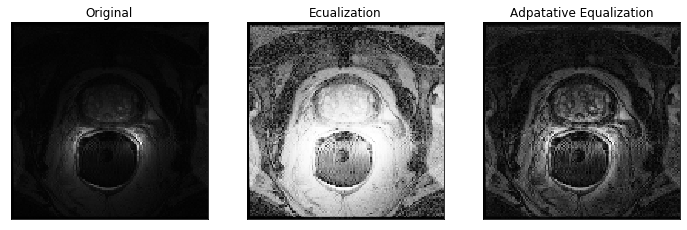

In [67]:
results = [img, equ, cl1]
images =["Original","Ecualization","Adpatative Equalization"]

plt.figure(figsize=(12,12))
for i in range(len(results)):
    plot.subplot(1,3,i+1)
    plot.title(images[i])
    plt.imshow(results[i],"gray")
    plot.xticks([])
    plot.yticks([])
plot.show()

#### Equilización imagen

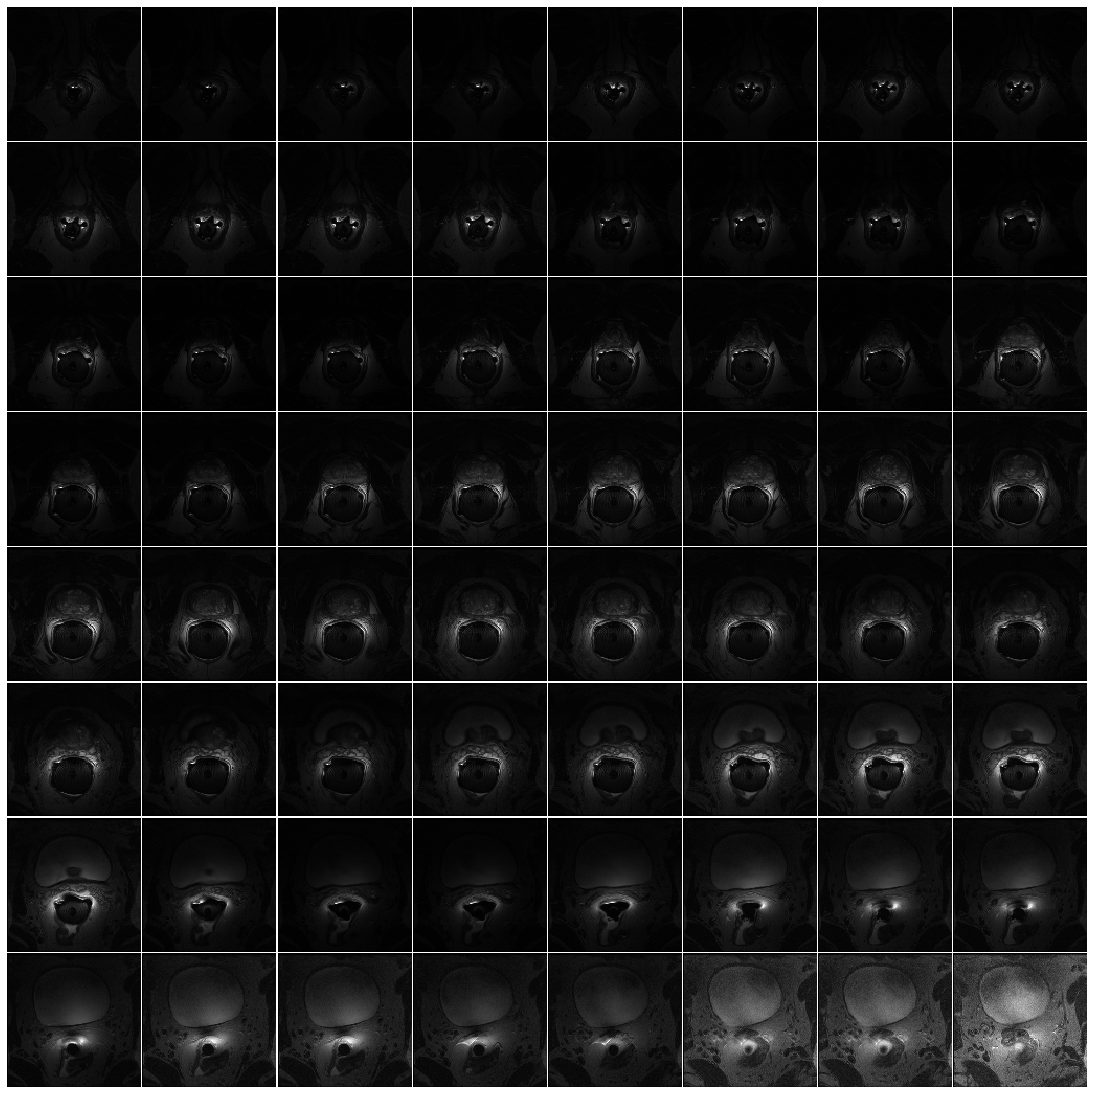

In [68]:
#Imagen sin transformación 

plt.figure(figsize=(15,15))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.01,0.01)
for i in range(prostata.shape[0]): plt.subplot(8,8,i+1), plt.imshow(prostata[i]), plt.axis('off')
plt.show()

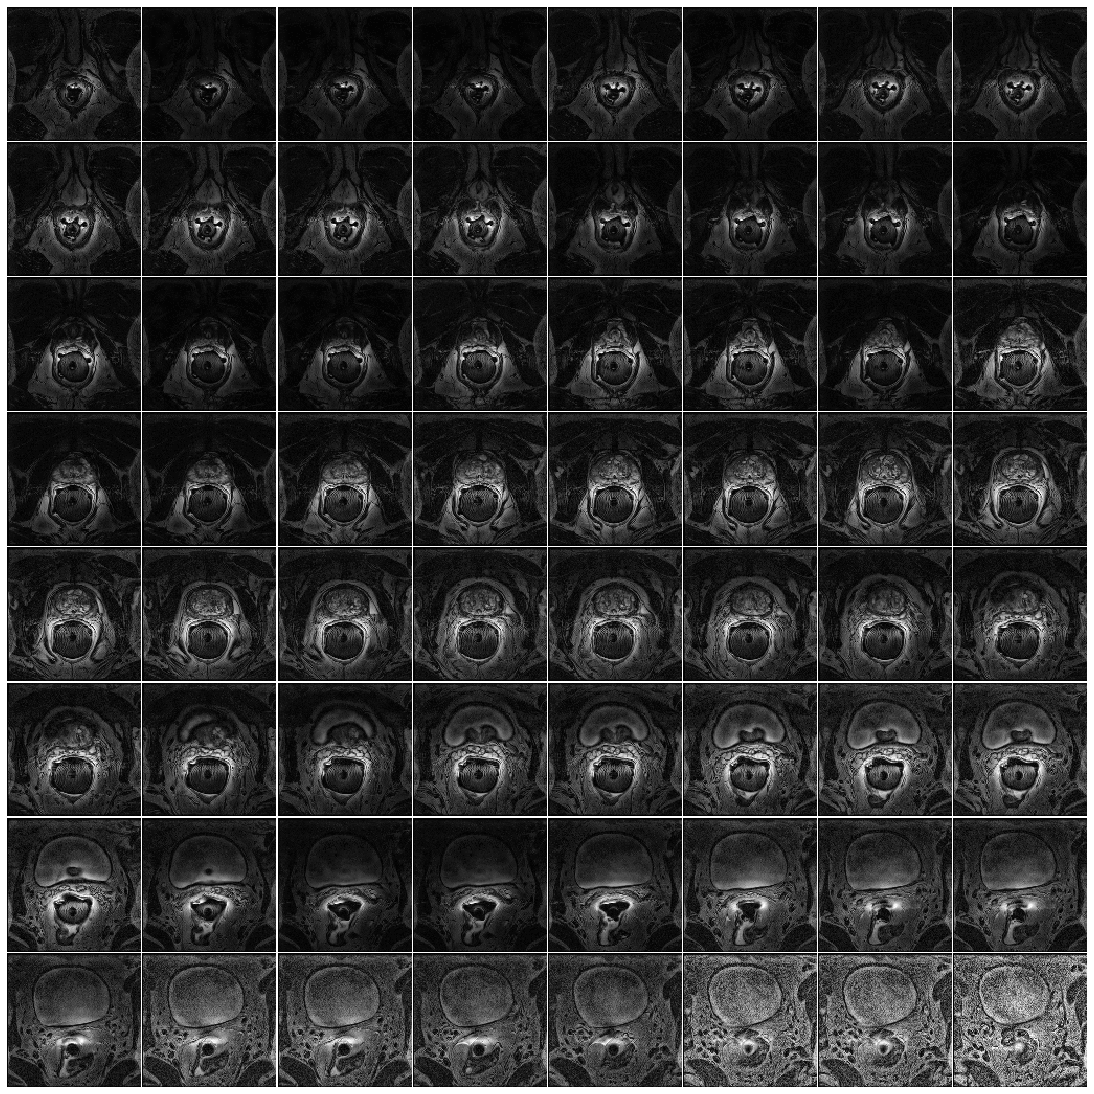

In [69]:
#Equalization
plt.figure(figsize=(15,15))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.01,0.01)
for i in range(prostata.shape[0]):
    
    img = prostata[i]
    img = (img - img.min())/(img.max() - img.min())
    img = np.array(img*255, dtype = np.uint8)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(20,20))
    cl1 = clahe.apply(img)
    
    plt.subplot(8,8,i+1), plt.imshow(cl1), plt.axis('off')
plt.show()

#### Gradientes imagenes

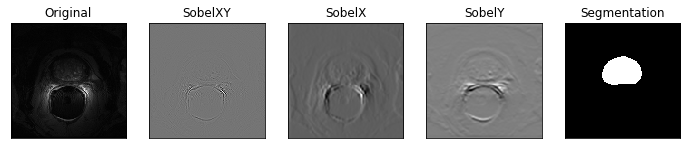

In [71]:
#Imagen original 
# se selecciona la imagen 37 para observar la prostata
img = prostata[36]
img = 255*((img - img.min())/(img.max() - img.min())) 
img = np.array(img, dtype = np.uint8)
seg = segmentacion[36]

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

results = [img, laplacian, sobelx, sobely, seg]
images =["Original","SobelXY","SobelX","SobelY","Segmentation"]

plt.figure(figsize=(12,12))
for i in range(len(results)):
    plot.subplot(1,len(results),i+1)
    plot.title(images[i])
    plt.imshow(results[i],"gray")
    plot.xticks([])
    plot.yticks([])
plot.show()

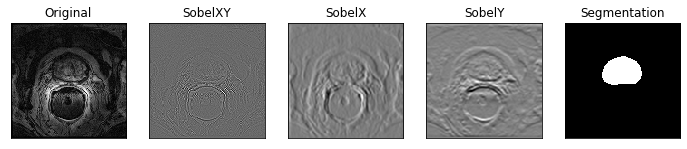

In [72]:
#Adpatative Equalization
# se selecciona la imagen 37 para observar la prostata
img = prostata[37]
img = 255*((img - img.min())/(img.max() - img.min())) 
img = np.array(img, dtype = np.uint8)
seg = segmentacion[36]

#Equilization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(20,20))
cl1 = clahe.apply(img)

laplacian = cv2.Laplacian(cl1,cv2.CV_64F)
sobelx = cv2.Sobel(cl1,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(cl1,cv2.CV_64F,0,1,ksize=5)

results = [cl1, laplacian, sobelx, sobely, seg]
images =["Original","SobelXY","SobelX","SobelY","Segmentation"]

plt.figure(figsize=(12,12))
for i in range(len(results)):
    plot.subplot(1,len(results),i+1)
    plot.title(images[i])
    plt.imshow(results[i],"gray")
    plot.xticks([])
    plot.yticks([])
plot.show()